In [1]:
import datumaro as dm
import os
from os import path as osp
import cv2
from matplotlib import pyplot as plt
import glob
from ultralytics import YOLO
from ultralytics import settings

# Update a setting
settings.update({'runs_dir': '/training/runs'})

DUP_LABELS_MAPPING = {
        'White Fish': 'Whitefish',
        'Bull Trout': 'Bull',
        'Lan prey': 'Lamprey',
        'Lampray': 'Lamprey'
        }

In [2]:
dataset = dm.Dataset.import_from("export_combined_bear_kitwanga_preprocess_yolo", "yolo")
print("Subset candidates:", dataset.subsets().keys())

2023-10-27 00:17:31.199375: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-27 00:17:31.239928: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 00:17:32.285759: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Subset candidates: dict_keys(['train', 'valid'])


In [3]:
subset = list(dataset.subsets().keys())[1]
print("Subset:", subset)

Subset: valid


In [4]:
def get_ids(dataset: dm.Dataset, subset: str):
    ids = []
    c = 0
    for item in dataset:
        if c > 8:
            break
        if item.subset == subset:
            ids += [item.id]
        c += 1

    return ids


#ids = get_ids(dataset, subset)
print("DatasetItem ids:", ids[:4])

DatasetItem ids: []


In [14]:
def load():
    dt1 = dm.Dataset.import_from('/mnt/shiorissd4tb/masamim/export_kitwanga_yolo/', 'yolo')
    #dt1.transform('remap_labels', mapping=DUP_LABELS_MAPPING)
    dt2 = dm.Dataset.import_from('/home/masamim/salmon-computer-vision/utils/export_bear_creek_yolo/', 'yolo')
    #dt2.transform('remap_labels', mapping=DUP_LABELS_MAPPING)
    return dt1, dt2

dt_kit, dt_br = load()

In [16]:
def merge():
    merged = dm.HLOps.merge(dt_kit, dt_br, merge_policy='union')
    return merged

dt_kit_br = merge()

KeyboardInterrupt: 

In [3]:
dt_kit_br_tiny = dm.Dataset.import_from('/mnt/shiorissd4tb/masamim/export_combined_kit_bear_yolo_tiny_test', 'yolo')
dt_kit_br_tiny_split = dt_kit_br_tiny.transform("split", task='detection', splits=[('train', 0.5), ('valid', 0.5)])

2023-11-03 09:01:29.702020: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-03 09:01:29.757307: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-03 09:01:30.791854: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
dm.components.operations.compute_ann_statistics(dt_kit_br_tiny_split.get_subset('valid'))

{'images count': 13915,
 'annotations count': 11426,
 'unannotated images count': 2836,
 'unannotated images': ['/home/masamim/salmon-computer-vision/utils/export_bear_creek_yolo_tiny/train/08-01-2021_01-00-09_m_salmon_camera/obj_train_data/frame_000001',
  '/home/masamim/salmon-computer-vision/utils/export_bear_creek_yolo_tiny/train/08-01-2021_01-00-09_m_salmon_camera/obj_train_data/frame_000003',
  '/home/masamim/salmon-computer-vision/utils/export_bear_creek_yolo_tiny/train/08-01-2021_01-00-09_m_salmon_camera/obj_train_data/frame_000004',
  '/home/masamim/salmon-computer-vision/utils/export_bear_creek_yolo_tiny/train/08-01-2021_01-00-09_m_salmon_camera/obj_train_data/frame_000005',
  '/home/masamim/salmon-computer-vision/utils/export_bear_creek_yolo_tiny/train/08-01-2021_01-00-09_m_salmon_camera/obj_train_data/frame_000007',
  '/home/masamim/salmon-computer-vision/utils/export_bear_creek_yolo_tiny/train/08-01-2021_01-00-09_m_salmon_camera/obj_train_data/frame_000010',
  '/home/masam

In [5]:
next(iter(dt_kit_br_tiny_split))

DatasetItem(id='/home/masamim/salmon-computer-vision/utils/export_bear_creek_yolo_tiny/train/08-01-2021_01-00-09_m_salmon_camera/obj_train_data/frame_000000', subset='train', media=ImageFromFile(path='/home/masamim/salmon-computer-vision/utils/export_bear_creek_yolo_tiny/train/08-01-2021_01-00-09_m_salmon_camera/obj_train_data/frame_000000.jpg'), annotations=[], attributes={})

In [6]:
dt_kit_br_tiny_split.export('/mnt/shiorissd4tb/masamim/export_combined_kit_bear_yolo_tiny_split', 'yolo', save_media=True, image_ext='.jpg')

In [86]:
def fix_empty_annos():
    dt_empty = dm.Dataset.import_from('/home/masamim/salmon-computer-vision/utils/empty_proj/', 'datumaro')
    #dt_empty.transform('remap_labels', mapping=DUP_LABELS_MAPPING)
    #dt_empty.export('/home/masamim/salmon-computer-vision/utils/empty_proj_fixed', 'datumaro', save_media=True)
    return dt_empty

#fix_empty_annos()

Dataset
	size=0
	source_path=/home/masamim/salmon-computer-vision/utils/empty_proj/
	media_type=<class 'datumaro.components.media.Image'>
	annotated_items_count=0
	annotations_count=0
subsets
	infos
	categories
	label: ['Coho', 'Bull', 'Rainbow', 'Sockeye', 'Pink', 'Whitefish', 'Chinook', 'Shiner', 'Pikeminnow', 'Chum', 'Steelhead', 'Jack Chinook', 'Juvenile Salmonoid', 'Lamprey', 'Cutthroat']

In [ ]:
#visualizer = dm.Visualizer(dataset, figsize=(16, 12), alpha=0.7)
#dm.Visualizer

In [ ]:
#fig = visualizer.vis_gallery(ids[:4], subset, (None, None))

In [ ]:
# Create a new YOLO model from scratch
#model = YOLO('yolov8n.yaml')

# Train the model using the 'coco128.yaml' dataset for 3 epochs
#results_train = model.train(data='export_combined_bear_kitwanga_preprocess_yolo/combined_bear_kitwanga_preprocess.yaml', 
#                            epochs=100, batch=128, device=[0, 1, 2, 3])

!yolo detect train data=export_combined_bear_kitwanga_all_yolo/combined_bear_kitwanga_all.yaml pretrained=train_0.645/weights/best.pt model=yolov8n.yaml epochs=100 imgsz=640 device=0,1,2,3 batch=512
!yolo detect train data=salm_dataset8010_yolo_kitwanga_bear_koeye_kwakwa_2023/2023_combined_salmon.yaml model=yolov8n.yaml epochs=100 imgsz=640 device=0,1,2,3 batch=512 cache=ram workers=32 plots=True
!yolo detect train data=export_combined_bear_kitwanga_all_yolo/combined_bear_kitwanga_all.yaml model=train_0.645/weights/best.pt epochs=100 imgsz=640 device=0,1,2,3 batch=512

In [ ]:
!yolo detect val data=export_combined_bear_kitwanga_all_yolo/combined_bear_kitwanga_all.yaml model=train_0.645/weights/best.pt device=0,1,2,3 batch=512 save_json=True
!yolo detect val data=export_combined_bear_kitwanga_preprocess_yolo/combined_bear_kitwanga_preprocess.yaml model=train_57_no_filt/weights/best.pt device=0,1,2,3 batch=512 save_json=True

In [11]:
settings

{'settings_version': '0.0.4',
 'datasets_dir': '/usr/src/datasets',
 'weights_dir': '/usr/src/ultralytics/weights',
 'runs_dir': '/training/runs',
 'uuid': '8765e340dc3a16f2d81ba2b190673429a59e3c2aa9083be50ddaa72612f8b714',
 'sync': True,
 'api_key': '',
 'clearml': True,
 'comet': True,
 'dvc': True,
 'hub': True,
 'mlflow': True,
 'neptune': True,
 'raytune': True,
 'tensorboard': True,
 'wandb': True}

In [15]:
import yaml
import pandas as pd

# Evaluate model's performance on the test set
def test_model(data, weights, device=0):
    model = YOLO(weights)
    metrics = model.val(data=data, batch=512, device=device, split='test', imgsz=640)
    return metrics

def get_class_metrics(metrics, name):
    with open('2023_combined_salmon.yaml', 'r') as file:
        data = yaml.safe_load(file)

    class_names = [data['names'][ind] for ind in metrics.box.ap_class_index]
    
    df_classes = pd.DataFrame({
        'name': [name] * len(class_names),
        'class': class_names,
        'AP50': metrics.box.ap50,
        'Precision': metrics.box.p,
        'Recall': metrics.box.r,
        'mAP50': [metrics.box.map50] * len(class_names)
    })

    return df_classes
    

In [3]:
# KiBeKoKw -> A, KiBe -> C, KoKw -> B
# AA -> Trained on A, tested on A

metrics_CC = test_model('salm_dataset8010_yolo_koeye_kwakwa_2023/2023_combined_salmon.yaml','runs/detect/train32/weights/best.pt')

Ultralytics YOLOv8.0.199 🚀 Python-3.10.13 torch-2.1.0 CUDA:0 (NVIDIA RTX A5000, 24248MiB)
YOLOv8n summary (fused): 168 layers, 3008963 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /mnt/ayumissd4tb/masamim/salm_dataset8010_yolo_empty_koeye_2023/test/batch1-pt1/2023-06-08_01-15-19_koeyefu/yolo_format/obj_train_data/2023-06-08_01-15-19_koeyefu.cache... 23341 images, 1195 b
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [01:26<00:00,  1.89s/it]
                   all      23341      30564      0.813      0.571      0.654      0.547
                  Coho      23341        279      0.709      0.982      0.962      0.897
                  Bull      23341         33          0          0          0          0
               Rainbow      23341      18164      0.881      0.955       0.97      0.753
               Sockeye      23341       3478      0.929      0.957      0.971      0.879
                  Pink      23341      

In [16]:
dfCC_classes = get_class_metrics(metrics_CC, 'CC')

In [20]:
dfCC_classes.to_csv('model_test_results/CC.csv', index=False)

In [ ]:
success = model.export(format='onnx', dynamic=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


   name      class      AP50  Precision    Recall   mAP50 sort_key
1    AA       Bull  0.415286   0.255833  0.552000  0.6119        A
6    AA    Chinook  0.804206   0.748963  0.748223  0.6119        A
9    AA       Chum  0.888201   0.975726  0.765968  0.6119        A
0    AA       Coho  0.977681   0.948374  0.963900  0.6119        A
12   AA  Cutthroat  0.394250   0.603967  0.292398  0.6119        A
..  ...        ...       ...        ...       ...     ...      ...
2    CC    Rainbow  0.041806   0.067949  0.094801  0.5374        C
7    CC     Shiner  0.946603   0.920451  0.803539  0.5374        C
3    CC    Sockeye  0.777805   0.730886  0.806194  0.5374        C
10   CC  Steelhead  0.032242   0.000000  0.000000  0.5374        C
5    CC  Whitefish  0.358848   0.249391  0.666890  0.5374        C

[120 rows x 7 columns]


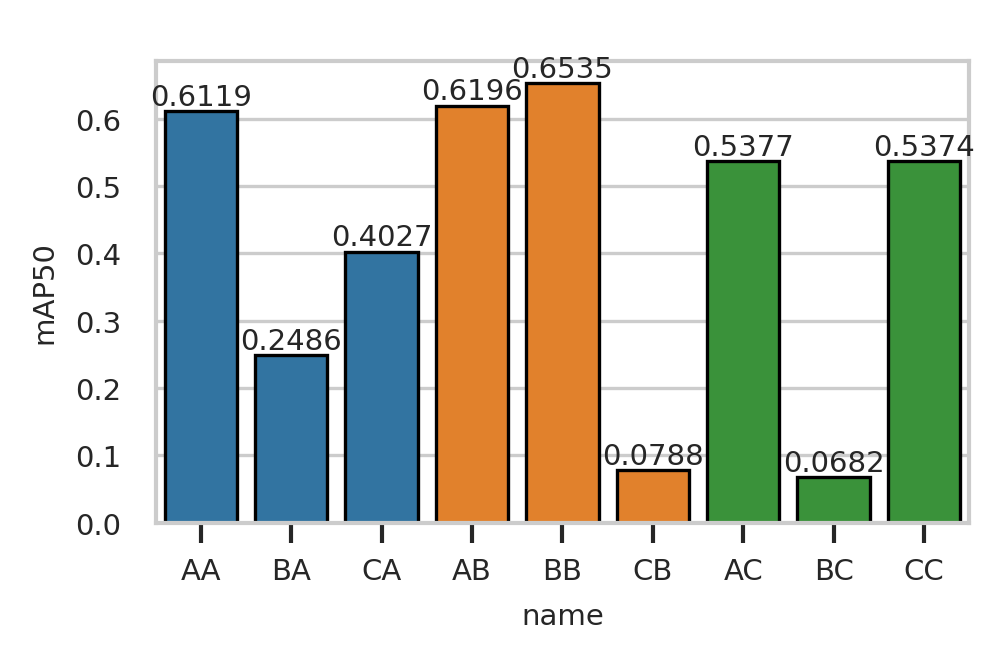

In [6]:
import pandas as pd
import glob
import seaborn as sns
from common_seaborn import *

def plot_maps(dfs):
    df_all = pd.concat(dfs)
    
    # Use the substring from the second character for names
    df_all['sort_key'] = df_all['name'].apply(lambda x: x[1:])
    
    df_all = df_all.sort_values(['sort_key', 'name', 'class'])
    df_all['mAP50'] = df_all['mAP50'].round(4)
    print(df_all)
    
    g_plot = sns.barplot(
        df_all,
        x=df_all['name'],
        #x=df_all['class'],
        y=df_all['mAP50'],
        #hue=df_all['name'],
        hue=df_all['sort_key'],
        legend=False
    )

    #g_plot.figure.autofmt_xdate()
    
    axes = g_plot.axes
    axes.legend(loc='upper center', bbox_to_anchor=(0,1.00,1,0.1),
               ncol=9, 
               #mode='expand',
               fancybox=True, frameon=False)
    
    for i in g_plot.containers:
        g_plot.bar_label(i,)

    return g_plot
    
dfs = []
for csv in glob.glob('model_test_results/*.csv'):
    dfs.append(pd.read_csv(csv))
g_plot = plot_maps(dfs)
g_plot.figure.savefig('model_test_results/figures/scratch_map50.pdf', bbox_inches='tight')
#g_plot.figure.savefig('model_test_results/figures/scratch_class_ap50.pdf', bbox_inches='tight')

             name      AP50  Precision    Recall     mAP50  counts
class                                                             
Coho           AA  0.977681   0.948374  0.963900  0.611929     952
Rainbow        AA  0.957928   0.888593  0.928938  0.611929     222
Shiner         AA  0.950714   0.942318  0.907586  0.611929       7
Stickleback    AA  0.949988   0.961401  0.870196  0.611929      79
Pink           AA  0.897193   0.747674  0.866450  0.611929     854
Chum           AA  0.888201   0.975726  0.765968  0.611929      20
Sockeye        AA  0.885409   0.849720  0.849874  0.611929     572
Chinook        AA  0.804206   0.748963  0.748223  0.611929     198
Pikeminnow     AA  0.684194   0.652416  0.110947  0.611929      47
Sculpin        AA  0.607291   0.966229  0.236210  0.611929       7
Bull           AA  0.415286   0.255833  0.552000  0.611929      51
Cutthroat      AA  0.394250   0.603967  0.292398  0.611929       7
Whitefish      AA  0.269855   0.239360  0.675603  0.611929    

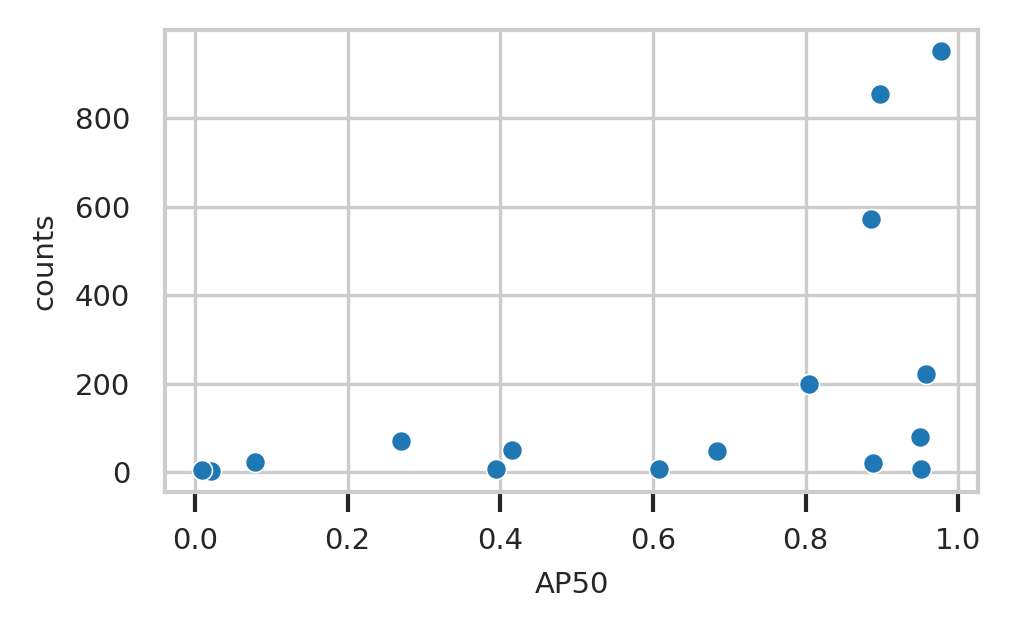

In [8]:
def plot_corr(dfs, counts):
    df_all = pd.concat(dfs)
    df_all = df_all[df_all['name'].str.startswith('AA')]
    df_all = df_all.set_index('class')
    df_all['counts'] = counts
    print(df_all.sort_values('AP50', ascending=False))

    g_plot = sns.scatterplot(
        df_all,
        x='AP50',
        y='counts'
    )

    return g_plot

g_plot = plot_corr(dfs, pd.read_csv('2023_sum_counts_gt.csv', index_col=0))
g_plot.figure.savefig('model_test_results/figures/scratch_counts_AP50_corr.pdf', bbox_inches='tight')

In [ ]:
# Initialize the YOLO model
model = YOLO('yolov8n.yaml')

# Tune hyperparameters for 30 epochs
model.tune(data='/mnt/shiorissd4tb/masamim/export_combined_kit_bear_yolo_tiny/combined_kit_bear_tiny.yaml', pretrained='/training/train_0.6381/weights/best.pt', epochs=30, iterations=300, batch=512, device=[0,1,2,3], plots=False, save=False, val=False)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [11]:
%matplotlib inline

def track_img_frames(model_path, frames_folder):
    botsort='botsort.yaml'
    bytetrack='bytetrack.yaml'
    
    model = YOLO(model_path)
    frames = glob.glob(osp.join(frames_folder, '*.jpg'))
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter('output.mp4', fourcc, 25.0, (1920, 1080))
    for frame in sorted(frames):
        results = model.track(frame, persist=True, tracker=bytetrack)
        
        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        out.write(annotated_frame)

    out.release()

track_img_frames('runs/detect/train20/weights/best.pt', '/mnt/shiorissd4tb/masamim/export_kitwanga_all_yolo/test/09-02-2020_07-49-21_m_salmon_camera/obj_train_data/')
#track_img_frames('train_57_no_filt/weights/best.pt', '/home/masamim/salmon-computer-vision/utils/export_bear_creek_all_yolo/test/09-04-2021_06-42-05_m_network_camera/obj_train_data/')

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'

image 1/1 /mnt/shiorissd4tb/masamim/export_kitwanga_all_yolo/test/09-02-2020_07-49-21_m_salmon_camera/obj_train_data/frame_000000.jpg: 384x640 (no detections), 5.8ms
Speed: 1.6ms preprocess, 5.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /mnt/shiorissd4tb/masamim/export_kitwanga_all_yolo/test/09-02-2020_07-49-21_m_salmon_camera/obj_train_data/frame_000001.jpg: 384x640 (no detections), 5.1ms
Speed: 1.5ms preprocess, 5.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /mnt/shiorissd4tb/masamim/export_kitwanga_all_yolo/test/09-02-2020_07-49-21_m_salmon_camera/obj_train_data/frame_000002.jpg: 384x640 (no detections), 5.2ms
Speed: 1.4ms preprocess, 5.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /mnt/shiorissd4tb/masamim/export_k

In [ ]:
# First convert to H264 by runnning `ffmpeg -i output.mp4 test.mp4`

from IPython.display import Video

Video("test.mp4", embed=True, width=1280)